In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

## Install libraries

```bash
conda create -n edu4 python=3.10 jupyter matplotlib
```

```bash 
! pip install -U -r requirements.txt
```

```bash
! pip install -U numpy
! pip install -U scikit-learn
```

In [2]:
! ls

data
images
requirements.txt
workshop_1_linear_regression.ipynb
workshop_2_logistic_regression_lda_qda_nb.ipynb


In [3]:
! pip install -U -r requirements.txt

## Update repository

In [4]:
! git pull

Already up to date.


## Add import path

In [5]:
import os
import sys
import gc

In [7]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [8]:
del module_path

## Organize imports

In [9]:
import multiprocessing
from pathlib import Path

In [10]:
import seaborn as sns

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import iqr
import sklearn
from sklearn import datasets
from sklearn.model_selection import (train_test_split, 
                                     RepeatedStratifiedKFold, cross_val_score)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis, 
                                           QuadraticDiscriminantAnalysis)
from sklearn.metrics import (mean_absolute_error, mean_squared_error, 
                             classification_report, confusion_matrix)

#### Number of CPU cores

In [13]:
workers = multiprocessing.cpu_count()
workers

8

## Initialize path

In [14]:
DATA = Path('data')
PATH = DATA / 'log_regr_lda_qda_np'
PUMPKIN_DIR = PATH / 'Pumpkin_Seeds_Dataset'
IRIS_DIR = PATH / 'iris'
PUMPKIN_DIR.mkdir(exist_ok=True, parents=True)
IRIS_DIR.mkdir(exist_ok=True, parents=True)

In [15]:
! ls

data
images
requirements.txt
workshop_1_linear_regression.ipynb
workshop_2_logistic_regression_lda_qda_nb.ipynb


In [16]:
! ls {PUMPKIN_DIR}

Pumpkin_Seeds_Dataset.arff
Pumpkin_Seeds_Dataset.xlsx
Pumpkin_Seeds_Dataset_Citation_Request.txt


## Download data

In [33]:
studen_scores_url = 'https://www.kaggle.com/datasets/muratkokludataset/pumpkin-seeds-dataset/download?datasetVersionNumber=1'

In [34]:
! wget -P {PATH} {studen_scores_url}

zsh:1: no matches found: https://www.kaggle.com/datasets/kamleshsam/student-scores/download?datasetVersionNumber=1


## Prepare data

In [17]:
SEED = 2022

In [18]:
studen_scores_path = PUMPKIN_DIR / 'Pumpkin_Seeds_Dataset.xlsx'

In [19]:
df = pd.read_excel(studen_scores_path)
df

Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0     56276    888.242           326.1485           220.2388        56831   
1     76631   1068.146           417.1932           234.2289        77280   
2     71623   1082.987           435.8328           211.0457        72663   
3     66458    992.051           381.5638           222.5322        67118   
4     66107    998.146           383.8883           220.4545        67117   
...     ...        ...                ...                ...          ...   
2495  79637   1224.710           533.1513           190.4367        80381   
2496  69647   1084.318           462.9416           191.8210        70216   
2497  87994   1210.314           507.2200           222.1872        88702   
2498  80011   1182.947           501.9065           204.7531        80902   
2499  84934   1159.933           462.8951           234.5597        85781   

      Equiv_Diameter  Eccentricity  Solidity  Extent  Roundness  \
0           267.6805        0.7376    0.9902  0.7453     0.8963   
1           312.3614        0.8275    0.9916  0.7151     0.8440   
2           301.9822        0.8749    0.9857  0.7400     0.7674   
3           290.8899        0.8123    0.9902  0.7396     0.8486   
4           290.1207        0.8187    0.9850  0.6752     0.8338   
...              ...           ...       ...     ...        ...   
2495        318.4289        0.9340    0.9907  0.4888     0.6672   
2496        297.7874        0.9101    0.9919  0.6002     0.7444   
2497        334.7199        0.8990    0.9920  0.7643     0.7549   
2498        319.1758        0.9130    0.9890  0.7374     0.7185   
2499        328.8485        0.8621    0.9901  0.7360     0.7933   

      Aspect_Ration  Compactness          Class  
0            1.4809       0.8207     Çerçevelik  
1            1.7811       0.7487     Çerçevelik  
2            2.0651       0.6929     Çerçevelik  
3            1.7146       0.7624     Çerçevelik  
4            1.7413       0.7557     Çerçevelik  
...             ...          ...            ...  
2495         2.7996       0.5973  Ürgüp Sivrisi  
2496         2.4134       0.6433  Ürgüp Sivrisi  
2497         2.2828       0.6599  Ürgüp Sivrisi  
2498         2.4513       0.6359  Ürgüp Sivrisi  
2499         1.9735       0.7104  Ürgüp Sivrisi  

[2500 rows x 13 columns]

In [20]:
df.shape

(2500, 13)

## Data analysis

In [21]:
df['Class'].value_counts() 

Çerçevelik       1300
Ürgüp Sivrisi    1200
Name: Class, dtype: int64

In [22]:
df.describe().T

count          mean           std         min  \
Area               2500.0  80658.220800  13664.510228  47939.0000   
Perimeter          2500.0   1130.279015    109.256418    868.4850   
Major_Axis_Length  2500.0    456.601840     56.235704    320.8446   
Minor_Axis_Length  2500.0    225.794921     23.297245    152.1718   
Convex_Area        2500.0  81508.084400  13764.092788  48366.0000   
Equiv_Diameter     2500.0    319.334230     26.891920    247.0584   
Eccentricity       2500.0      0.860879      0.045167      0.4921   
Solidity           2500.0      0.989492      0.003494      0.9186   
Extent             2500.0      0.693205      0.060914      0.4680   
Roundness          2500.0      0.791533      0.055924      0.5546   
Aspect_Ration      2500.0      2.041702      0.315997      1.1487   
Compactness        2500.0      0.704121      0.053067      0.5608   

                            25%          50%           75%          max  
Area               70765.000000  79076.00000  89757.500000  136574.0000  
Perimeter           1048.829750   1123.67200   1203.340500    1559.4500  
Major_Axis_Length    414.957850    449.49660    492.737650     661.9113  
Minor_Axis_Length    211.245925    224.70310    240.672875     305.8180  
Convex_Area        71512.000000  79872.00000  90797.750000  138384.0000  
Equiv_Diameter       300.167975    317.30535    338.057375     417.0029  
Eccentricity           0.831700      0.86370      0.897025       0.9481  
Solidity               0.988300      0.99030      0.991500       0.9944  
Extent                 0.658900      0.71305      0.740225       0.8296  
Roundness              0.751900      0.79775      0.834325       0.9396  
Aspect_Ration          1.801050      1.98420      2.262075       3.1444  
Compactness            0.663475      0.70770      0.743500       0.9049

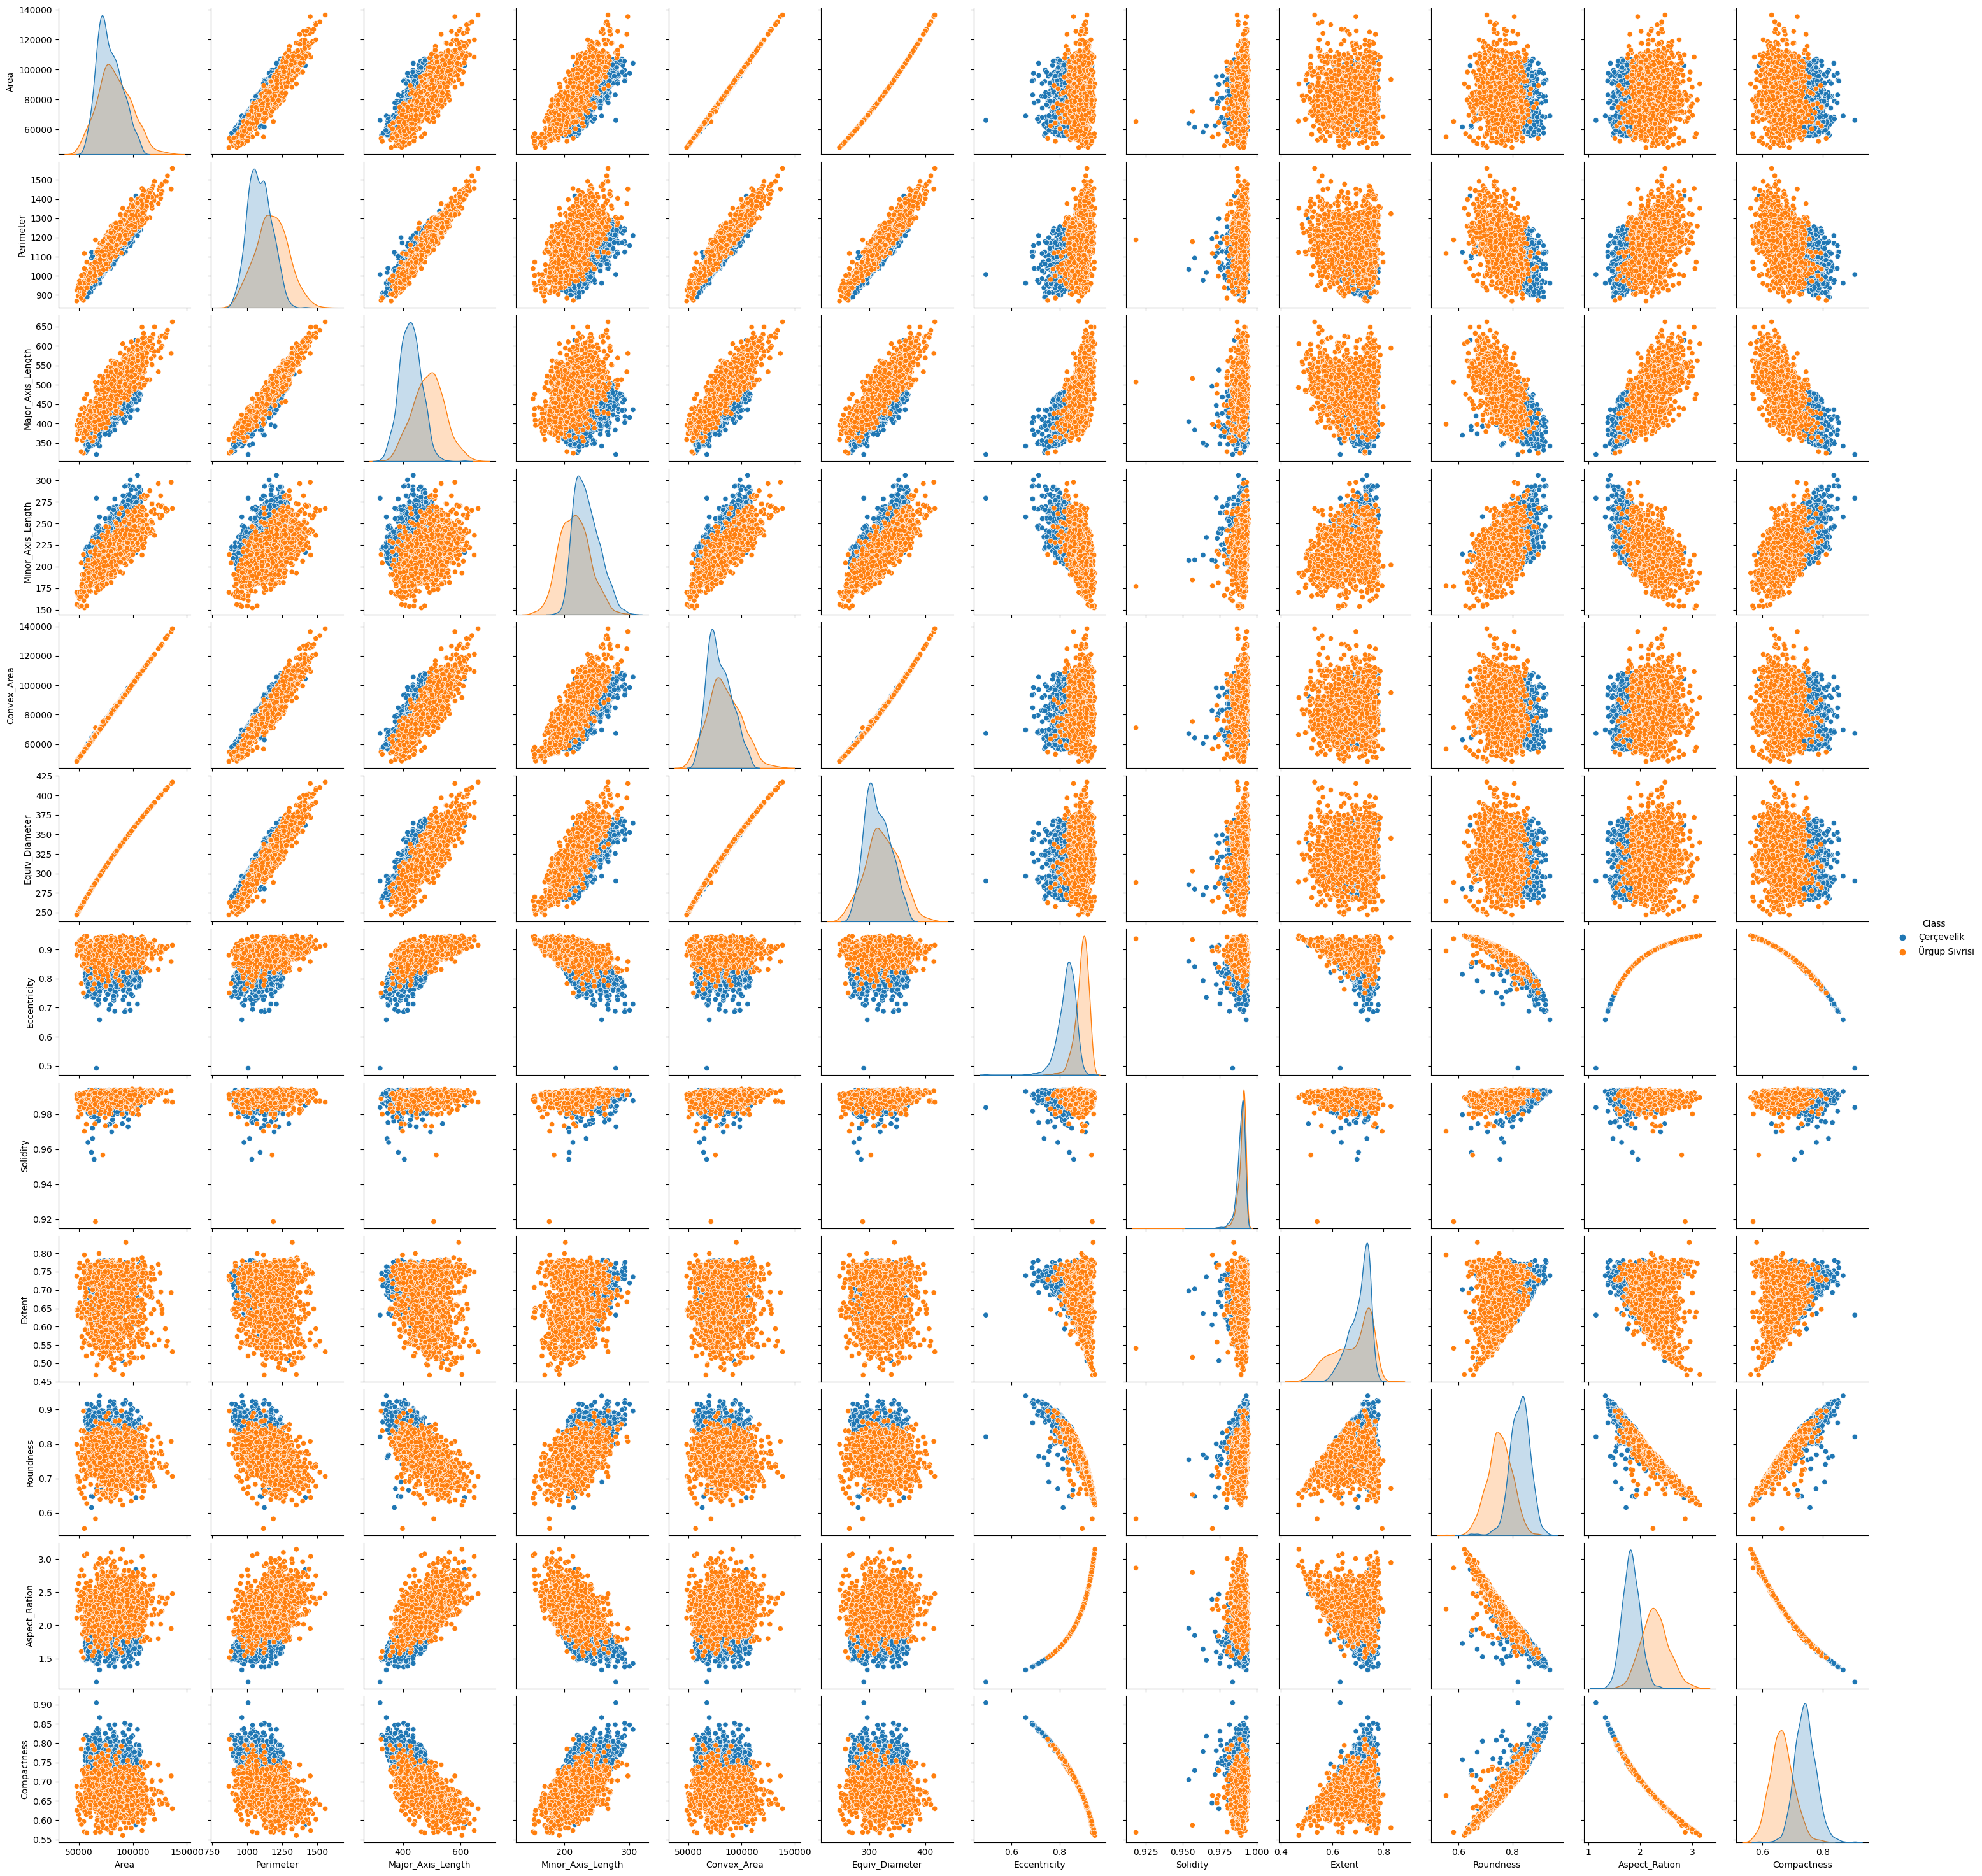

In [23]:
sns.pairplot(data=df, hue='Class')

<AxesSubplot: >

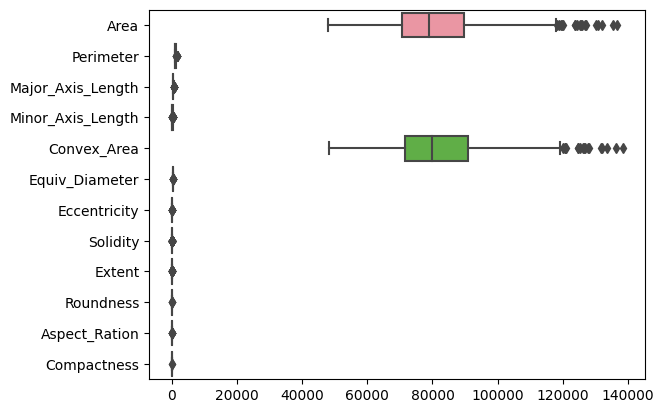

In [24]:
sns.boxplot(data=df, orient='h') 

/var/folders/t0/pbj59l394sdcgxqh8gvj099h0000gn/T/ipykernel_4123/279408709.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


<AxesSubplot: >

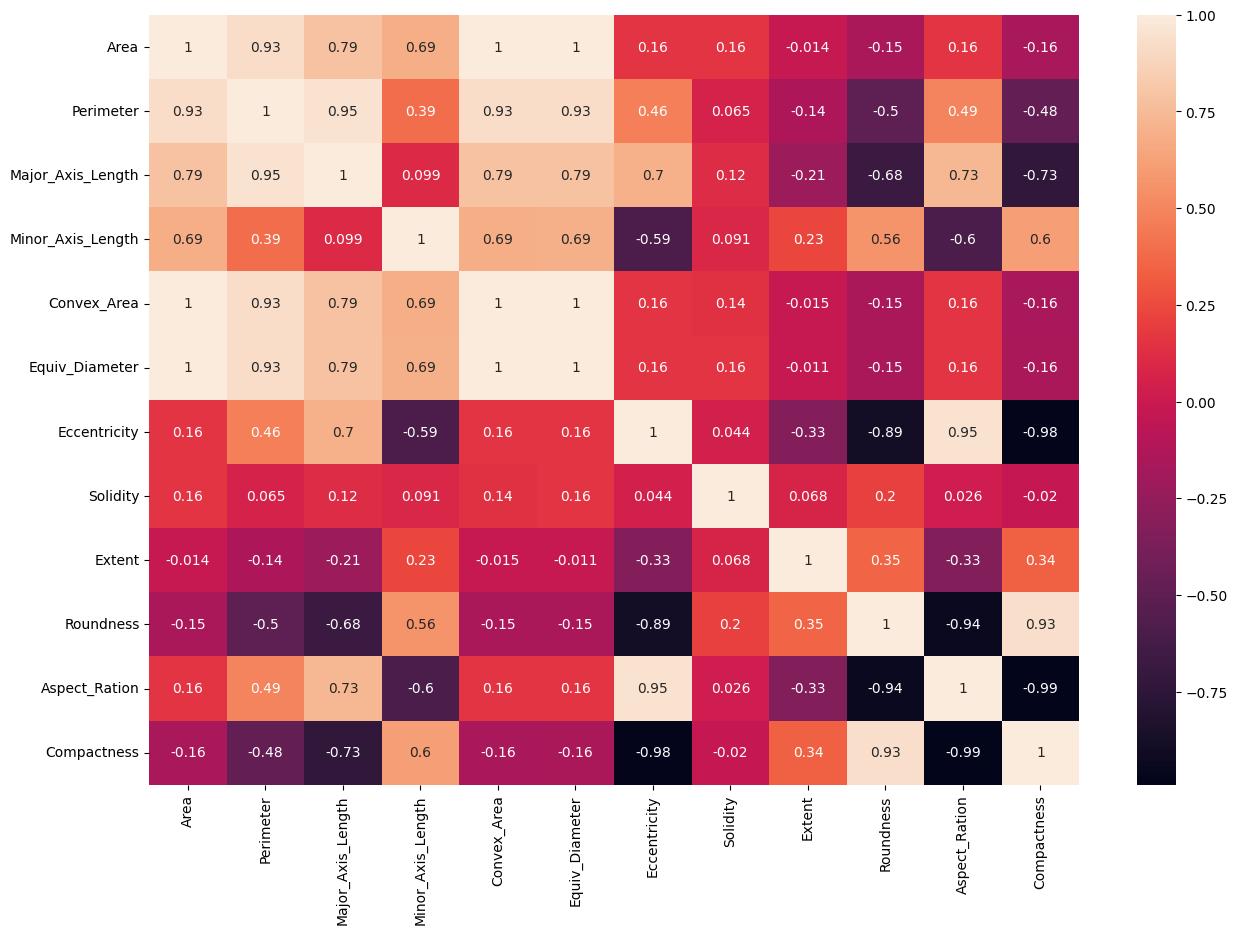

In [25]:
plt.figure(figsize=(15, 10))

correlations = df.corr()
sns.heatmap(correlations, annot=True)

## Pre-processing the Data

In [26]:
y = df['Class']
X = df.drop(columns=['Class'], axis=1)

In [27]:
y = y.replace('Çerçevelik', 0).replace('Ürgüp Sivrisi', 1)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.25, 
                                                    random_state=SEED)

In [30]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1875, 12), (1875,), (625, 12), (625,))

#### Scaling Data

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

```python
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
```

<AxesSubplot: >

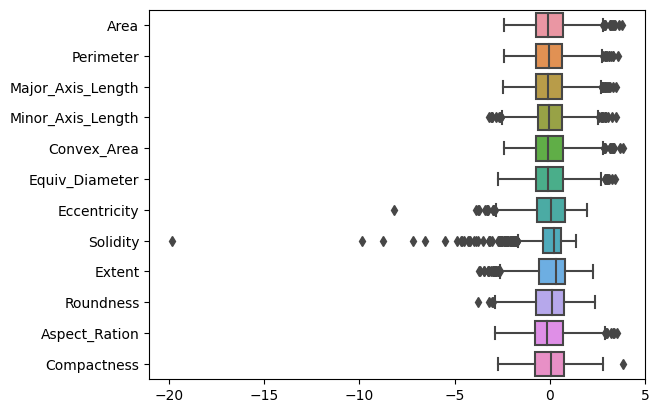

In [32]:
column_names = df.columns[:12] # selecting all columns apart from Class from the original data
X_train = pd.DataFrame(X_train, columns=column_names)

sns.boxplot(data=X_train, orient='h')

#### Removing Outliers with IQR Method

Calculate quantiles and IQR to remove outliers
$$
Minimum = Q1 - 1.5*IQR
$$
and
$$
Maximum = Q3 + 1.5*IQR
$$

<img src="images/quantiles.png">Quartiles</img>

In [34]:
Q1 = X_train.quantile(q=.25)
Q3 = X_train.quantile(q=.75)

IQR = X_train.apply(iqr)

In [38]:
# Calculationg minimum and maximum values
minimum = X_train < (Q1-1.5*IQR)
maximum = X_train > (Q3+1.5*IQR)

# The tilde (~) is a reverse operator, 
# and it will select any row that is not below the minimum or above the maximum area, 
# this is our IQR filter
filter = ~(minimum | maximum).any(axis=1)

# We can now select the IQR rows in X_train
X_train = X_train[filter]

In [42]:
X_train.shape, y_train.shape, y_train.shape[0] - X_train.shape[0]

((1725, 12), (1875,), 150)

In [43]:
y_train = y_train.iloc[X_train.index]

In [44]:
y_train.shape

(1725,)

## Fit the Logistic Regression Model

In [48]:
logreg = LogisticRegression(random_state=SEED, 
                            n_jobs=workers)

In [49]:
# When fitting a DataFrame, rather than a bare NumPy array
# to avoid exceptions, we'll feed only the values without column names
logreg.fit(X_train.values, y_train)

LogisticRegression(n_jobs=8, random_state=2022)

In [50]:
y_pred = logreg.predict(X_test)

In [51]:
X_train[:3]

Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0 -0.891933  -1.083713          -1.448308           0.340364    -0.892945   
1 -0.799605  -1.006534          -0.981673          -0.139500    -0.796978   
2  1.385734   1.854232           2.048863          -0.123478     1.397683   

   Equiv_Diameter  Eccentricity  Solidity    Extent  Roundness  Aspect_Ration  \
0       -0.894549     -1.718182 -0.085025  0.092223   0.872875      -1.382440   
1       -0.793988     -0.625896 -0.252897  0.781677   0.898187      -0.753057   
2        1.366514      1.321126 -0.252897  0.282360  -1.560769       1.657765   

   Compactness  
0     1.552552  
1     0.715458  
2    -1.528181

In [52]:
y_pred[:3] 

array([0, 1, 0])

In [53]:
y_pred_proba = logreg.predict_proba(X_test)

In [54]:
y_pred_proba[:3]

array([[0.87228409, 0.12771591],
       [0.36192807, 0.63807193],
       [0.89133256, 0.10866744]])

## Evaluating the Model with Classification Reports

Precision:
$$
precision = \frac{\text{true positive}}{\text{true positive} + \text{false positive}}
$$

Recall:
$$
recall = \frac{\text{true positive}}{\text{true positive} + \text{false negative}}
$$

Accuracy:
$$
accuracy = \frac{\text{number of correct predictions}}{\text{total number of predictions}}
$$

f1-score:
$$
\text{f1-score} = 2* \frac{\text{precision} * \text{recall}}{\text{precision} + \text{recall}}
$$



In [55]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       335
           1       0.89      0.84      0.86       290

    accuracy                           0.88       625
   macro avg       0.88      0.87      0.88       625
weighted avg       0.88      0.88      0.88       625



<AxesSubplot: >

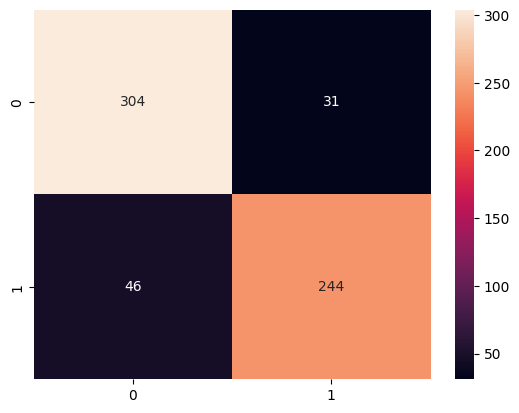

In [56]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

## Estimate coefficients

In [57]:
logreg.coef_

array([[ 1.52213973, -0.96660451,  0.15057051, -0.73385101,  1.47175643,
        -1.55723761, -1.29651816,  1.06812225,  0.02136034, -0.8846573 ,
         1.80223171, -1.65388141]])

In [58]:
logreg.intercept_

array([0.16442159])

Inferencee with Logistic Regression models:

$$
p{X} = \frac{e^{(b_0 + b_1 * x_1 + b_2 * x_2 + b_3 * x_3 + \ldots + b_n * x_n)}}{1 + e^{(b_0 + b_1 * x_1 + b_2 * x_2 + b_3 * x_3 + \ldots + b_n * x_n)}}
$$

## Inference / evaluate the model

In [60]:
import math

lin_reg = logreg.intercept_[0] + \
((logreg.coef_[0][0]* X_test[:1][0][0])+ \
(logreg.coef_[0][1]* X_test[:1][0][1])+ \
(logreg.coef_[0][2]* X_test[:1][0][2])+ \
(logreg.coef_[0][3]* X_test[:1][0][3])+ \
(logreg.coef_[0][4]* X_test[:1][0][4])+ \
(logreg.coef_[0][5]* X_test[:1][0][5])+ \
(logreg.coef_[0][6]* X_test[:1][0][6])+ \
(logreg.coef_[0][7]* X_test[:1][0][7])+ \
(logreg.coef_[0][8]* X_test[:1][0][8])+ \
(logreg.coef_[0][9]* X_test[:1][0][9])+ \
(logreg.coef_[0][10]* X_test[:1][0][10])+ \
(logreg.coef_[0][11]* X_test[:1][0][11]))

px = math.exp(lin_reg)/(1 +(math.exp(lin_reg)))
1 - px, px

(0.872284086840917, 0.12771591315908307)

In [68]:
X_test.shape, logreg.coef_.shape

((625, 12), (1, 12))

In [72]:
logit_v = X_test @ logreg.coef_.T + logreg.intercept_
logit_v

array([[-1.92130679e+00],
       [ 5.67005525e-01],
       [-2.10442537e+00],
       [-2.54138094e+00],
       [ 2.34125832e+00],
       [-2.84530128e+00],
       [-2.05768844e+00],
       [-7.99501288e+00],
       [-3.70184571e+00],
       [ 3.61415723e-01],
       [ 4.53472443e+00],
       [ 5.99057999e+00],
       [ 3.67986378e+00],
       [-5.60225161e+00],
       [-1.98693170e+00],
       [-2.71493188e+00],
       [-1.45623183e+00],
       [-1.93249493e+00],
       [ 4.59125878e+00],
       [ 2.00187255e+00],
       [ 1.18925749e+01],
       [-2.24638408e+00],
       [-5.32464834e+00],
       [-1.80841827e+00],
       [ 6.36621844e-01],
       [ 2.57261150e+00],
       [ 1.77464266e+00],
       [-5.45291578e+00],
       [ 6.46954664e+00],
       [ 3.85188517e+00],
       [ 5.25204719e+00],
       [ 2.15310017e+00],
       [-3.00145092e-01],
       [-1.25473806e-01],
       [-3.95972135e+00],
       [-2.22952951e+00],
       [ 1.92533446e+00],
       [ 1.06902707e+00],
       [-3.8

In [73]:
e_v = np.exp(logit_v)
e_v

array([[1.46415503e-01],
       [1.76297994e+00],
       [1.21915710e-01],
       [7.87575648e-02],
       [1.03943077e+01],
       [5.81167548e-02],
       [1.27748929e-01],
       [3.37139801e-04],
       [2.46779360e-02],
       [1.43536005e+00],
       [9.31978295e+01],
       [3.99646333e+02],
       [3.96409939e+01],
       [3.68954692e-03],
       [1.37115492e-01],
       [6.62094633e-02],
       [2.33113030e-01],
       [1.44786515e-01],
       [9.86184912e+01],
       [7.40290547e+00],
       [1.46177199e+05],
       [1.05781029e-01],
       [4.87006330e-03],
       [1.63913199e-01],
       [1.89008508e+00],
       [1.30999905e+01],
       [5.89817312e+00],
       [4.28379584e-03],
       [6.45191160e+02],
       [4.70817366e+01],
       [1.90956794e+02],
       [8.61151419e+00],
       [7.40710741e-01],
       [8.82078870e-01],
       [1.90684270e-02],
       [1.07579033e-01],
       [6.85744181e+00],
       [2.91254443e+00],
       [2.22694649e-02],
       [3.04695720e+01],


In [74]:
y_pred_v = e_v / (1 + e_v)
y_pred_v

array([[1.27715913e-01],
       [6.38071929e-01],
       [1.08667442e-01],
       [7.30076594e-02],
       [9.12236880e-01],
       [5.49247090e-02],
       [1.13277810e-01],
       [3.37026176e-04],
       [2.40836024e-02],
       [5.89383098e-01],
       [9.89384044e-01],
       [9.97504033e-01],
       [9.75394303e-01],
       [3.67598420e-03],
       [1.20581852e-01],
       [6.20979888e-02],
       [1.89044333e-01],
       [1.26474686e-01],
       [9.89961703e-01],
       [8.80993544e-01],
       [9.99993159e-01],
       [9.56618233e-02],
       [4.84646073e-03],
       [1.40829401e-01],
       [6.53989425e-01],
       [9.29077966e-01],
       [8.55034082e-01],
       [4.26552321e-03],
       [9.98452470e-01],
       [9.79202082e-01],
       [9.94790494e-01],
       [8.95958121e-01],
       [4.25522015e-01],
       [4.68672638e-01],
       [1.87116257e-02],
       [9.71298930e-02],
       [8.72732115e-01],
       [7.44411848e-01],
       [2.17843393e-02],
       [9.68223273e-01],


In [78]:
(1 - y_pred_v[0], y_pred_v[0])

(array([0.87228409]), array([0.12771591]))

In [79]:
logreg.predict_proba(X_test[:1])

array([[0.87228409, 0.12771591]])

Recall logits:

$$
ln \left( \frac{p}{1-p} \right)
$$

In [80]:
lp = logreg.predict_log_proba(X_test[:1])
lp

array([[-0.13664012, -2.05794691]])

In [81]:
np.exp(lp)

array([[0.87228409, 0.12771591]])

## Quadratic discriminant analysis

In [ ]:
iris_url = 'https://www.kaggle.com/datasets/uciml/iris/download?datasetVersionNumber=2'

#### Load dataset

```python
#load iris dataset
iris = datasets.load_iris()

#convert dataset to pandas DataFrame
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                 columns = iris['feature_names'] + ['target'])
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.columns = ['s_length', 's_width', 'p_length', 'p_width', 'target', 'species']

#view first six rows of DataFrame
df.head(), len(df.index)
```


In [82]:
! ls {IRIS_DIR}

Iris.csv        database.sqlite


In [84]:
df = pd.read_csv(IRIS_DIR / 'Iris.csv')

In [86]:
df

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  

[150 rows x 6 columns]

In [87]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [93]:
y = df['Species']
X = df.drop(columns=['Id', 'Species'], axis=1)
X.shape, y.shape, df['Species'].value_counts()

((150, 4),
 (150,),
 Iris-setosa        50
 Iris-versicolor    50
 Iris-virginica     50
 Name: Species, dtype: int64)

```python
# #define predictor and response variables
X = df[['s_length', 's_width', 'p_length', 'p_width']]
y = df['species']
X.shape, y.shape
```

In [94]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED)

## Train the model

In [98]:
qda = QuadraticDiscriminantAnalysis()

In [105]:
qda = qda.fit(X_train, y_train)
qda

QuadraticDiscriminantAnalysis()

#### Evluate the model

In [106]:
y_pred = qda.predict(X_test)

In [107]:
cr = classification_report(y_test, y_pred)
print(cr)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.88      0.88      0.88         8
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



<AxesSubplot: >

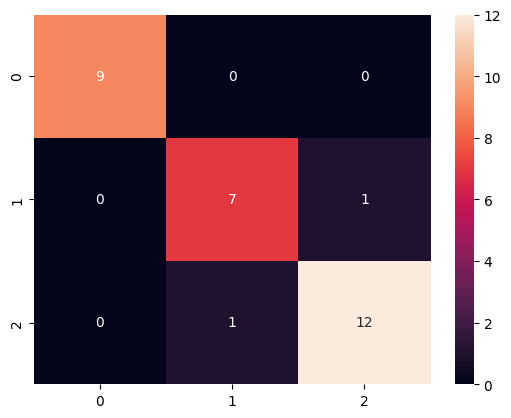

In [108]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

#### Evaluate the model K-folds CV times

In [110]:
#Define method to evaluate model
cv = RepeatedStratifiedKFold(
    n_splits=40, n_repeats=12, random_state=SEED)

#evaluate model
scores = cross_val_score(qda, X, y, scoring='accuracy', cv=cv, n_jobs=workers)
print(np.mean(scores)) 

0.9723958333333333
